# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import pandas.tseries
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_rows', 20)
pd.options.display.max_columns=300

In [2]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [3]:
data = pd.read_csv('../../Data/zillow_data.csv')
data

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [4]:
texas_data= data[data['State'] == 'TX']
texas_data

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,211100.0,205700.0,200900.0,196800.0,193600.0,191400.0,190400.0,190800.0,192700.0,196000.0,201300.0,207400.0,212200.0,214600.0,215100.0,213400.0,210200.0,206100.0,202100.0,198800.0,196100.0,194100.0,193400.0,193400.0,193100.0,192700.0,193000.0,193700.0,194800.0,196100.0,197800.0,199700.0,201900.0,204500.0,207800.0,211500.0,214900.0,217800.0,221100.0,224100.0,226700.0,228200.0,228500.0,227200.0,224900.0,221900.0,219100.0,216900.0,215400.0,214500.0,214600.0,215600.0,217000.0,218400.0,219600.0,220000.0,219100.0,216800.0,213100.0,208700.0,204000.0,199600.0,195700.0,192800.0,190800.0,189600.0,189200.0,189200.0,189600.0,190300.0,190800.0,191000.0,190700.0,190300.0,189800.0,189200.0,188600.0,188000.0,187500.0,187200.0,187000.0,186900.0,187100.0,187700.0,188800.0,190300.0,191800.0,193000.0,193900.0,194500.0,195100.0,195700.0,196400.0,197400.0,198500.0,199600.0,200300.0,200800.0,201000.0,201000.0,201000.0,200900.0,200900.0,200900.0,201200.0,201600.0,202200.0,202700.0,203300.0,203900.0,204500.0,205100.0,205800.0,206500.0,207200.0,207800.0,208400.0,208900.0,209400.0,209700.0,210000.0,210400.0,211000.0,211600.0,212400.0,213000.0,213400.0,213600.0,213800.0,213900.0,214100.0,213900.0,213500.0,212600.0,211200.0,209500.0,207900.0,206700.0,205900.0,205300.0,204600.0,203800.0,203200.0,202400.0,201700.0,201200.0,200700.0,200000.0,199700.0,199700.0,199900.0,200100.0,200200.0,200200.0,200100.0,201300.0,202000.0,202100.0,202700.0,203700.0,203300.0,203100.0,202900.0,202400.0,202400.0,202500.0,202500.0,202400.0,202500.0,202100.0,201300.0,200700.0,200500.0,200000.0,199300.0,199100.0,199200.0,199400.0,199500.0,199600.0,200100.0,200700.0,201800.0,202700.0,203000.0,203000.0,20300

In [5]:
austin_city = texas_data[texas_data['Metro'] == 'Austin']
austin_city

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
18,92593,78660,Pflugerville,TX,Austin,Travis,19,138900.0,138600.0,138400.0,138500.0,138700.0,139000.0,139300.0,139600.0,139900.0,140200.0,140600.0,141300.0,141800.0,142200.0,142400.0,142400.0,142100.0,141800.0,141400.0,141000.0,140600.0,140100.0,139600.0,139100.0,138500.0,138000.0,137400.0,136900.0,136500.0,136300.0,136400.0,136700.0,137100.0,137700.0,138400.0,139300.0,140300.0,141400.0,142600.0,143700.0,144800.0,145900.0,146800.0,147500.0,148000.0,148400.0,148500.0,148600.0,148600.0,148700.0,148700.0,148800.0,149000.0,149200.0,149400.0,149600.0,149700.0,149600.0,149600.0,149600.0,149700.0,149900.0,150300.0,150700.0,151300.0,151800.0,152300.0,152700.0,153100.0,153300.0,153500.0,153700.0,154000.0,154300.0,154500.0,154800.0,155000.0,155000.0,154800.0,154400.0,153800.0,153300.0,152900.0,152600.0,152400.0,152200.0,152200.0,152100.0,152000.0,152000.0,152000.0,152200.0,152800.0,153800.0,155100.0,156600.0,158000.0,159100.0,159900.0,160400.0,160800.0,161100.0,161500.0,161900.0,162200.0,162500.0,162700.0,162700.0,162500.0,162100.0,161600.0,161100.0,160700.0,160300.0,160100.0,160100.0,160200.0,160200.0,160300.0,160300.0,160500.0,160700.0,161200.0,161800.0,162600.0,163500.0,164200.0,164800.0,165400.0,166000.0,166600.0,167100.0,167600.0,168200.0,168800.0,169500.0,170200.0,170900.0,171700.0,172600.0,173300.0,173800.0,174100.0,174300.0,174300.0,174300.0,174400.0,174400.0,174300.0,174100.0,173900.0,173500.0,173100.0,172600.0,172300.0,172000.0,171600.0,171300.0,170800.0,170300.0,169700.0,169400.0,169500.0,169700.0,169900.0,170100.0,170400.0,170500.0,170600.0,170900.0,171400.0,171600.0,171600.0,171600.0,171500.0,171200.0,171000.0,170400.0,169800.0,169600.0,169600.0,169000.0,167800.0,166900.0,166500.0,166100.0,165400.0,165000.0,165100.0,165600.0,165500.0,165000.0,164700.0,165100.0,165800.0,166500.0,167100.0,1

In [6]:
# I'm working on these since Emine is doing the first 37
austin_city['RegionName'].tail(36)

4969     78751
5068     78735
5209     78621
5213     78754
5307     78752
         ...  
10440    78652
10970    78619
12221    78659
12831    78655
12908    76530
Name: RegionName, Length: 36, dtype: int64

In [7]:
zip_78751 = melt_data(austin_city[austin_city['RegionName'] == 78751])
zip_78735 = melt_data(austin_city[austin_city['RegionName'] == 78735])
zip_78621 = melt_data(austin_city[austin_city['RegionName'] == 78621])
zip_78754 = melt_data(austin_city[austin_city['RegionName'] == 78754])
zip_78752 = melt_data(austin_city[austin_city['RegionName'] == 78752])
zip_78653 = melt_data(austin_city[austin_city['RegionName'] == 78653])
zip_76574 = melt_data(austin_city[austin_city['RegionName'] == 76574])
zip_78644 = melt_data(austin_city[austin_city['RegionName'] == 78644])
zip_78620 = melt_data(austin_city[austin_city['RegionName'] == 78620])
zip_78676 = melt_data(austin_city[austin_city['RegionName'] == 78676])
zip_78617 = melt_data(austin_city[austin_city['RegionName'] == 78617])
zip_78724 = melt_data(austin_city[austin_city['RegionName'] == 78724])
zip_78747 = melt_data(austin_city[austin_city['RegionName'] == 78747])
zip_78737 = melt_data(austin_city[austin_city['RegionName'] == 78737])
zip_78739 = melt_data(austin_city[austin_city['RegionName'] == 78739])
zip_78726 = melt_data(austin_city[austin_city['RegionName'] == 78726])
zip_78732 = melt_data(austin_city[austin_city['RegionName'] == 78732])
zip_78645 = melt_data(austin_city[austin_city['RegionName'] == 78645])
zip_78642 = melt_data(austin_city[austin_city['RegionName'] == 78642])
zip_78669 = melt_data(austin_city[austin_city['RegionName'] == 78669])
zip_78612 = melt_data(austin_city[austin_city['RegionName'] == 78612])
zip_78756 = melt_data(austin_city[austin_city['RegionName'] == 78756])
zip_78957 = melt_data(austin_city[austin_city['RegionName'] == 78957])
zip_78721 = melt_data(austin_city[austin_city['RegionName'] == 78721])
zip_78730 = melt_data(austin_city[austin_city['RegionName'] == 78730])
zip_78736 = melt_data(austin_city[austin_city['RegionName'] == 78736])
zip_78648 = melt_data(austin_city[austin_city['RegionName'] == 78648])
zip_78733 = melt_data(austin_city[austin_city['RegionName'] == 78733])
zip_78722 = melt_data(austin_city[austin_city['RegionName'] == 78722])
zip_78725 = melt_data(austin_city[austin_city['RegionName'] == 78725])
zip_78616 = melt_data(austin_city[austin_city['RegionName'] == 78616])
zip_78652 = melt_data(austin_city[austin_city['RegionName'] == 78652])
zip_78619 = melt_data(austin_city[austin_city['RegionName'] == 78619])
zip_78659 = melt_data(austin_city[austin_city['RegionName'] == 78659])
zip_78655 = melt_data(austin_city[austin_city['RegionName'] == 78655])
zip_76530 = melt_data(austin_city[austin_city['RegionName'] == 76530])

In [8]:
from statsmodels.tsa.stattools import adfuller
adfuller(zip_78751)[1]

0.6760184023107004

## Function for ADFuller Test

In [9]:
def fuller_test(zip_list):
    """Takes in a list of zip codes and outputs the results of the adjusted Dickey-Fuller test"""
    p_vals = []
    for z in zip_list:
        dftest = adfuller(z)
        p_vals.append(dftest[1])
    print(p_vals)

In [10]:
atx = [zip_78751, zip_78735, zip_78621, zip_78754, zip_78752, zip_78653, zip_76574, zip_78644,
       zip_78620, zip_78676, zip_78617, zip_78724, zip_78747, zip_78737, zip_78739, zip_78726,
       zip_78732, zip_78645, zip_78642, zip_78669, zip_78612, zip_78756, zip_78957, zip_78721,
       zip_78730, zip_78736, zip_78648, zip_78733, zip_78722, zip_78725, zip_78616, zip_78652,
       zip_78619, zip_78659, zip_78655, zip_76530]

In [11]:
fuller_test(atx)

[0.6760184023107004, 3.293458081320103e-06, 0.9905342142145832, 0.9938738597017469, 0.9490053134266835, 0.9594649426471038, 0.9617894617545852, 0.81926806124094, 0.9949808522532465, 0.9979708616724775, 0.8848908085232841, 0.8291997227753714, 0.9869405440096627, 0.9792988539727427, 0.625252525013429, 0.8401832992269757, 0.9564815198270582, 0.9918662575714268, 0.9952083273659601, 0.9744942669017022, 0.9968014778663471, 0.9160280751170138, 0.9974513446860688, 0.9294752993655944, 0.7639508871278782, 0.9965099745714691, 0.9562790977444416, 0.9789158844678691, 0.7986875626477575, 0.9899371036386057, 0.9857412246880389, 0.9989049810730645, 0.9699152924399597, 0.9975829058698776, 0.9857648803118991, 0.004858510423601573]


In [12]:
zd = {'78751': zip_78751, '78735': zip_78735, '78621': zip_78621, '78754': zip_78754, '78752': zip_78752, 
      '78653': zip_78653, '76574': zip_76574, '78644': zip_78644, '78620': zip_78620, '78676': zip_78676, 
      '78617': zip_78617, '78724': zip_78724, '78747': zip_78747, '78737': zip_78737, '78739': zip_78739, 
      '78726': zip_78726, '78732': zip_78732, '78645': zip_78645, '78642': zip_78642, '78669': zip_78669, 
      '78612': zip_78612, '78756': zip_78756, '78957': zip_78957, '78721': zip_78721, '78730': zip_78730, 
      '78736': zip_78736, '78648': zip_78648, '78733': zip_78733, '78722': zip_78722, '78725': zip_78725, 
      '78616': zip_78616, '78652': zip_78652, '78619': zip_78619, '78659': zip_78659, '78655': zip_78655, 
      '76530': zip_76530}

In [13]:
zd['78735']

,value
time,
1996-04-01,772100.0
1996-05-01,765800.0
1996-06-01,760200.0
1996-07-01,755200.0
1996-08-01,751100.0
...,...
2017-12-01,473200.0
2018-01-01,473500.0
2018-02-01,475500.0


In [14]:
zd.keys()
adfuller(zd['78751'])

(-1.1943571463654323,
 0.6760184023107004,
 15,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 3885.387774526975)

In [15]:
def fuller_test_2(zip_dict):
    """Takes in a dictionary of zip codes and outputs the p-value from the adjusted Dickey-Fuller test"""
    keys = []
    p_vals = []
    for key in zip_dict:
        df = zip_dict[key]
        p_vals.append(adfuller(df)[1])
        keys.append(key)
    l = list(zip(keys,p_vals)) 
    l.sort(key=lambda tup: tup[1])
    return l

In [16]:
fuller_test_2(zd)

[('78735', 3.293458081320103e-06),
 ('76530', 0.004858510423601573),
 ('78739', 0.625252525013429),
 ('78751', 0.6760184023107004),
 ('78730', 0.7639508871278782),
 ('78722', 0.7986875626477575),
 ('78644', 0.81926806124094),
 ('78724', 0.8291997227753714),
 ('78726', 0.8401832992269757),
 ('78617', 0.8848908085232841),
 ('78756', 0.9160280751170138),
 ('78721', 0.9294752993655944),
 ('78752', 0.9490053134266835),
 ('78648', 0.9562790977444416),
 ('78732', 0.9564815198270582),
 ('78653', 0.9594649426471038),
 ('76574', 0.9617894617545852),
 ('78619', 0.9699152924399597),
 ('78669', 0.9744942669017022),
 ('78733', 0.9789158844678691),
 ('78737', 0.9792988539727427),
 ('78616', 0.9857412246880389),
 ('78655', 0.9857648803118991),
 ('78747', 0.9869405440096627),
 ('78725', 0.9899371036386057),
 ('78621', 0.9905342142145832),
 ('78645', 0.9918662575714268),
 ('78754', 0.9938738597017469),
 ('78620', 0.9949808522532465),
 ('78642', 0.9952083273659601),
 ('78736', 0.9965099745714691),
 ('786

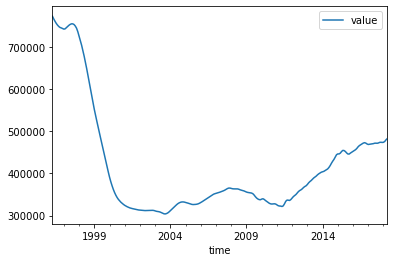

In [17]:
zip_78735.plot();

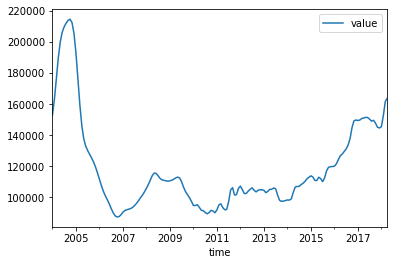

In [18]:
zip_76530.plot();

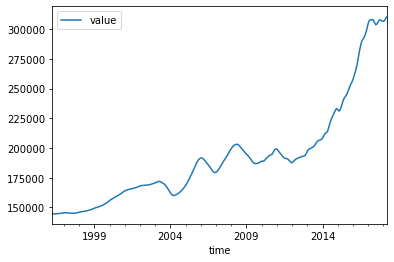

In [19]:
zip_78652.plot();

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
# Fit an ARMA model - what should our parameters be?
arima_order = (1,1,0) #should be a tuple, like (0,0,0)
mod_arima = ARIMA(zip_76530, 
                 order=arima_order)
res_arima = mod_arima.fit()

# Print out summary information on the fit
print(res_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  172
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1631.203
Date:                Tue, 16 Nov 2021   AIC                           3266.405
Time:                        08:34:07   BIC                           3272.689
Sample:                    01-01-2004   HQIC                          3268.955
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1562      0.006     24.660      0.000       0.144       0.169
sigma2      1.105e+07   5.62e-13   1.96e+19      0.000     1.1e+07     1.1e+07
Ljung-Box (L1) (Q):                  73.79   Jarque-

/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [43]:
"""From Machine Learning Mastery by Jason Brownlee 
(https://machinelearningmastery.com/how-to-grid-search-deep-learning-models-for-time-series-forecasting/)"""
# grid search persistence models
from math import sqrt
from numpy import mean
from pandas import read_csv
from sklearn.metrics import mean_squared_error
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))
 
# fit a model
def model_fit(train, config):
    return None
 
# forecast with a pre-fit model
def model_predict(model, history, offset):
    return history[-offset]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # fit model
    model = model_fit(train, cfg)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = model_predict(model, history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    print(' > %.3f' % error)
    return error
 
# score a model, return None on failure
def repeat_evaluate(data, config, n_test, n_repeats=10):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    # summarize score
    result = mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test):
    # evaluate configs
    scores = [repeat_evaluate(data, cfg, n_test) for cfg in cfg_list]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

In [44]:
# define dataset
series = zip_76530
data = series.values
# data split
n_test = 12
# model configs
cfg_list = [1, 6, 12, 24, 36]
# grid search
scores = grid_search(data, cfg_list, n_test)
print('done')
# list top 10 configs
for cfg, error in scores[:10]:
    print(cfg, error)

 > 3554.223
 > 3554.223
 > 3554.223
 > 3554.223
 > 3554.223
 > 3554.223
 > 3554.223
 > 3554.223
 > 3554.223
 > 3554.223
> Model[1] 3554.223
 > 6727.679
 > 6727.679
 > 6727.679
 > 6727.679
 > 6727.679
 > 6727.679
 > 6727.679
 > 6727.679
 > 6727.679
 > 6727.679
> Model[6] 6727.679
 > 13318.471
 > 13318.471
 > 13318.471
 > 13318.471
 > 13318.471
 > 13318.471
 > 13318.471
 > 13318.471
 > 13318.471
 > 13318.471
> Model[12] 13318.471
 > 33496.181
 > 33496.181
 > 33496.181
 > 33496.181
 > 33496.181
 > 33496.181
 > 33496.181
 > 33496.181
 > 33496.181
 > 33496.181
> Model[24] 33496.181
 > 41398.843
 > 41398.843
 > 41398.843
 > 41398.843
 > 41398.843
 > 41398.843
 > 41398.843
 > 41398.843
 > 41398.843
 > 41398.843
> Model[36] 41398.843
done
1 3554.222840509582
6 6727.67914415266
12 13318.47088320077
24 33496.18137439947
36 41398.84257641349


## Plotting

In [22]:
# x = np.arange(test.shape[0])
# plt.plot(x, test, color='orange', label='Actual')
# plt.plot(zip_76530.index, res_arima.predict(n_periods=zip_76530.shape[0]), color='green', label='Predicted')
# plt.title('Actual test samples vs. forecasts')
# plt.legend()
# plt.show()

In [23]:
# fig, ax = plt.subplots()

# ts['hour'] = ts.index
# ts['hour'] = ts.hour.apply(lambda x: x.hour)
# ts['business_hours'] = ts.hour.apply(lambda x: 9 <= x <= 17)

# bh_ratio = ts.business_hours.value_counts()[1]/len(ts)

# x = ts.business_hours.value_counts().index
# y = ts.business_hours.value_counts()
# sns.barplot(x=x, y=y)

# ax.set_title(f'{bh_ratio: 0.2%} of Offenses\n Happen Btwn 9 and 5');

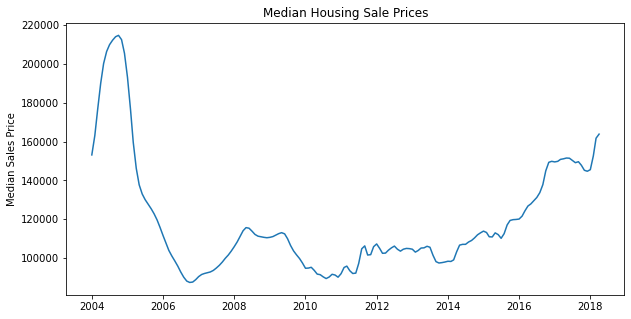

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(zip_76530.index, zip_76530.values)
ax.set_title('Median Housing Sale Prices')
ax.set_ylabel('Median Sales Price');

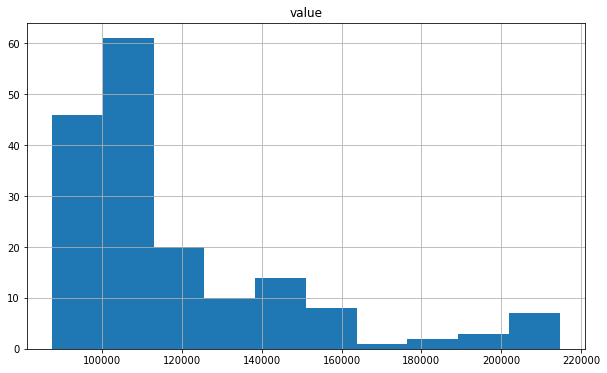

In [25]:
zip_76530.hist(figsize=(10, 6))
plt.show()

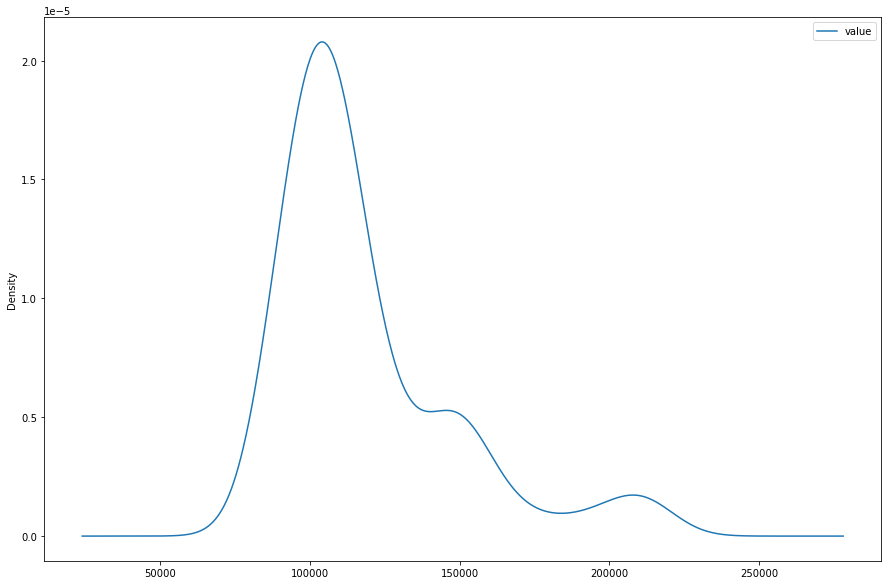

In [26]:
zip_76530.plot(kind='kde', figsize=(15, 10))
plt.show()

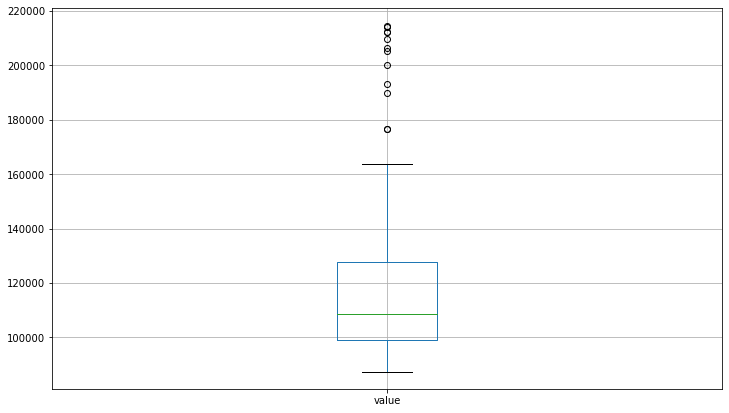

In [27]:
zip_76530.boxplot(figsize=(12, 7))
plt.show()

## Model Functions

In [28]:
def arima_models(ts, order=(1,0,0)):
    model = ARIMA(ts, order=order)
    model_fit = model.fit()
    return model_fit.aic

In [29]:
arima_models(zip_76530, order=(1,0,0))

/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


3334.219051085667

In [30]:
year = zip_76530.groupby(pd.Grouper(freq='A')).mean()
year

,value
time,
2004-12-31,196433.333333
2005-12-31,140625.000000
2006-12-31,96183.333333
2007-12-31,95633.333333
2008-12-31,111691.666667
2009-12-31,107583.333333
2010-12-31,92116.666667
2011-12-31,98225.000000
2012-12-31,104641.666667


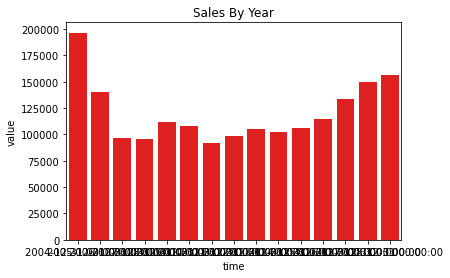

In [31]:
import seaborn as sns

fig, ax = plt.subplots()
sns.barplot(x=year.index, y=year.value, color= 'r', ax=ax)

ax.set_title("Sales By Year");

# Step 2: Data Preprocessing

In [32]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

## Train-Test Split

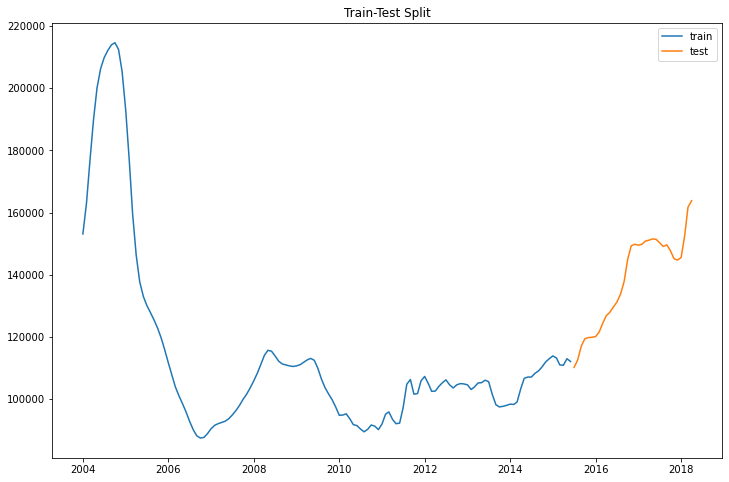

In [33]:
cutoff = round(zip_76530.shape[0]*0.8)
cutoff

# Define train and test sets according to the index found above
train = zip_76530[:cutoff]

test = zip_76530[cutoff:]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [34]:
from sklearn.model_selection import TimeSeriesSplit
split = TimeSeriesSplit()

for train_ind, val_ind in split.split(train):
    print(train_ind, val_ind)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45] [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68] [69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91] [ 92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 1

## Baseline Model

In [35]:
# we can perform this with the shift operator
# The prediction for the next day is the original series shifted to the future by one day.
naive = train.shift(1)
naive

,value
time,
2004-01-01,NaN
2004-02-01,153100.0
2004-03-01,163100.0
2004-04-01,176500.0
2004-05-01,189900.0
...,...
2015-02-01,113900.0
2015-03-01,113200.0
2015-04-01,111000.0


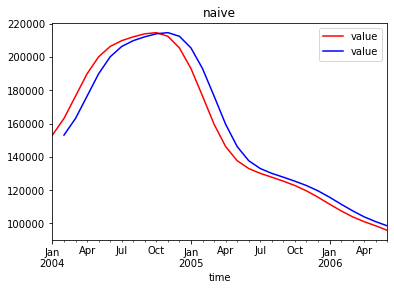

In [36]:
fig, ax = plt.subplots()

train[0:30].plot(ax=ax, c='r', label='original')
naive[0:30].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

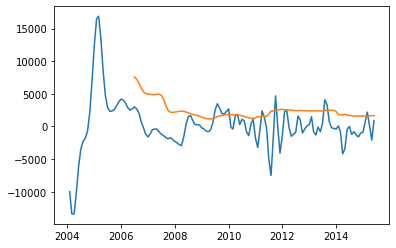

In [37]:
fig, ax = plt.subplots()
residuals = naive[1:] - train[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(30).std());

In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(train[1:], naive.dropna()))

3982.5165355845515

In [39]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

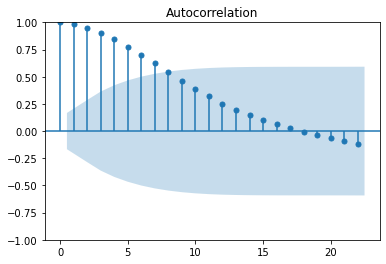

In [40]:
plot_acf(train);

/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


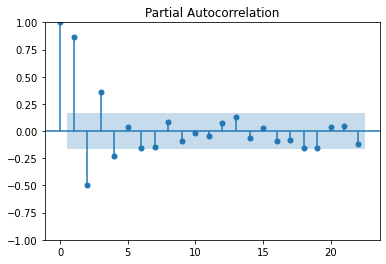

In [41]:
plot_pacf(train.diff().dropna());

# Step 3: EDA and Visualization

In [42]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results